In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2

### 2.1

In [ ]:
file_path = 'star_classification.csv'
df = pd.read_csv(file_path)
df.head(10)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
5,1.237680e+18,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,301,3,110,5.658977e+18,QSO,1.424659,5026,55855,741
6,1.237679e+18,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,301,2,462,1.246262e+19,QSO,0.586455,11069,58456,113
7,1.237679e+18,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,7773,301,2,346,6.961443e+18,GALAXY,0.477009,6183,56210,15
8,1.237661e+18,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,3716,301,5,108,7.459285e+18,GALAXY,0.660012,6625,56386,719
9,1.237671e+18,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,5934,301,4,122,2.751763e+18,STAR,-0.000008,2444,54082,232


In [ ]:
# Assuming 'df' is your original DataFrame
# Define the size of the subsample (adjust the value as needed)
subsample_size = 0.2  # 50% of the original dataset

# Create a subsample of your DataFrame
df = df.sample(frac=subsample_size, random_state=42)

# Use 'subsample_df' for subsequent steps like model training, hyperparameter tuning, etc.


### 2.2

In [ ]:
print("Basic information about the data:")
print(df.info())

Basic information about the data:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 75721 to 42410
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   obj_ID       20000 non-null  float64
 1   alpha        20000 non-null  float64
 2   delta        20000 non-null  float64
 3   u            20000 non-null  float64
 4   g            20000 non-null  float64
 5   r            20000 non-null  float64
 6   i            20000 non-null  float64
 7   z            20000 non-null  float64
 8   run_ID       20000 non-null  int64  
 9   rerun_ID     20000 non-null  int64  
 10  cam_col      20000 non-null  int64  
 11  field_ID     20000 non-null  int64  
 12  spec_obj_ID  20000 non-null  float64
 13  class        20000 non-null  object 
 14  redshift     20000 non-null  float64
 15  plate        20000 non-null  int64  
 16  MJD          20000 non-null  int64  
 17  fiber_ID     20000 non-null  int64  
dtypes: float

In [ ]:
print("\nSize of the dataset:")
print(df.shape)


Size of the dataset:
(20000, 18)


In [ ]:
print("\nBasic statistics:")
print(df.describe())


Basic statistics:
             obj_ID         alpha         delta             u             g  \
count  2.000000e+04  20000.000000  20000.000000  20000.000000  20000.000000   
mean   1.237665e+18    177.828704     24.146161     22.065885     20.626228   
std    8.493015e+12     96.874144     19.623348      2.245218      2.036681   
min    1.237646e+18      0.013337    -17.451390     10.996230     10.511390   
25%    1.237659e+18    127.029010      5.012040     20.336965     18.972295   
50%    1.237663e+18    181.365434     23.742855     22.173205     21.092440   
75%    1.237668e+18    234.136922     39.882597     23.661895     22.117705   
max    1.237681e+18    359.999810     82.947622     29.234380     29.862580   

                  r             i             z        run_ID  rerun_ID  \
count  20000.000000  20000.000000  20000.000000  20000.000000   20000.0   
mean      19.639106     19.084067     18.765492   4495.323450     301.0   
std        1.851280      1.758997      1.763

### 2.3

In [ ]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64


In [ ]:
df.fillna(df.mean(), inplace=True)

/var/folders/w6/wff1s8k12sj6xnprmhdvzcbr0000gn/T/ipykernel_7549/2693109243.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


### 2.4

In [ ]:
df['MJD'] = pd.to_datetime(df['MJD'], unit='D', origin='1858-11-17')

In [ ]:
df['magnitude'] = df[['u', 'g', 'r', 'i', 'z']].sum(axis=1)

MJD stands for Modified Julian Date. It's a timekeeping system that represents the number of days that have passed since November 17, 1858, at 00:00 UTC (Coordinated Universal Time), but using Julian days (where each day starts at noon).


In astronomy and astrophysics, magnitude often refers to the measure of brightness of celestial objects. The 'u', 'g', 'r', 'i', and 'z' columns in your dataset could potentially represent the brightness of stars in different wavelength bands or filters.

In [ ]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID,magnitude
75721,1.237679e+18,16.956890,3.646130,23.33542,21.95143,20.48149,19.60300,19.13094,7712,301,6,442,4.855017e+18,GALAXY,0.506237,4312,2010-11-11,495,104.50228
80184,1.237662e+18,240.063240,6.134131,17.86033,16.79228,16.43001,16.30923,16.25873,3894,301,1,243,2.448928e+18,STAR,0.000345,2175,2008-05-26,348,83.65058
19864,1.237679e+18,30.887222,1.188710,18.18911,16.89469,16.42161,16.24627,16.18549,7717,301,1,536,8.255357e+18,STAR,0.000004,7332,2014-01-26,943,83.93717
76699,1.237668e+18,247.594401,10.887780,24.99961,21.71203,21.47148,21.30532,21.29109,5323,301,1,134,4.577999e+18,STAR,-0.000291,4066,2010-09-05,326,110.77953
92991,1.237679e+18,18.896451,-5.261330,23.76648,21.79737,20.69543,20.23403,19.97464,7881,301,3,148,8.910472e+18,STAR,-0.000136,7914,2015-11-05,363,106.46795


### 3.1

In [ ]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
statistics = numeric_columns.describe()
print(statistics)

             obj_ID         alpha         delta             u             g  \
count  2.000000e+04  20000.000000  20000.000000  20000.000000  20000.000000   
mean   1.237665e+18    177.828704     24.146161     22.065885     20.626228   
std    8.493015e+12     96.874144     19.623348      2.245218      2.036681   
min    1.237646e+18      0.013337    -17.451390     10.996230     10.511390   
25%    1.237659e+18    127.029010      5.012040     20.336965     18.972295   
50%    1.237663e+18    181.365434     23.742855     22.173205     21.092440   
75%    1.237668e+18    234.136922     39.882597     23.661895     22.117705   
max    1.237681e+18    359.999810     82.947622     29.234380     29.862580   

                  r             i             z        run_ID  rerun_ID  \
count  20000.000000  20000.000000  20000.000000  20000.000000   20000.0   
mean      19.639106     19.084067     18.765492   4495.323450     301.0   
std        1.851280      1.758997      1.763986   1977.442609  

### 3.2

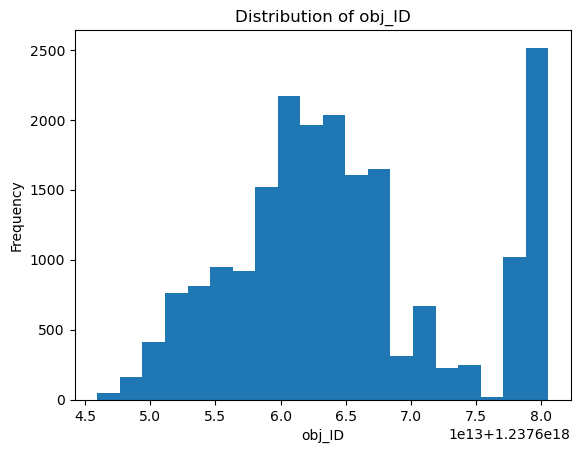

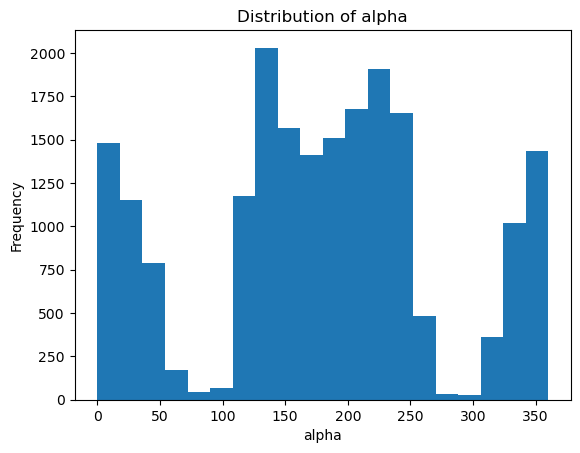

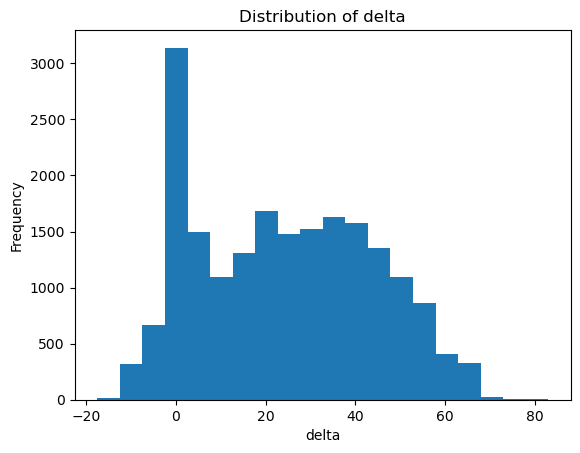

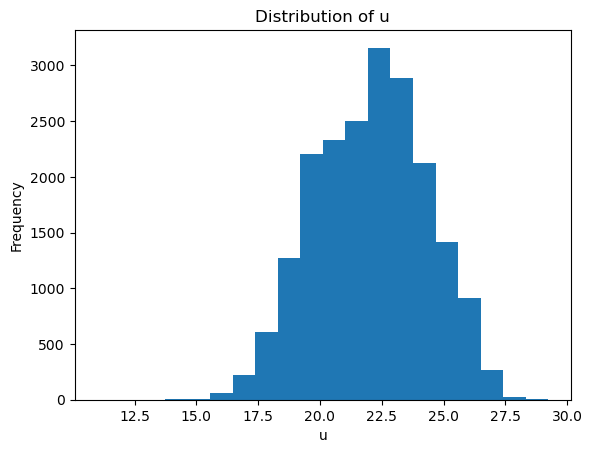

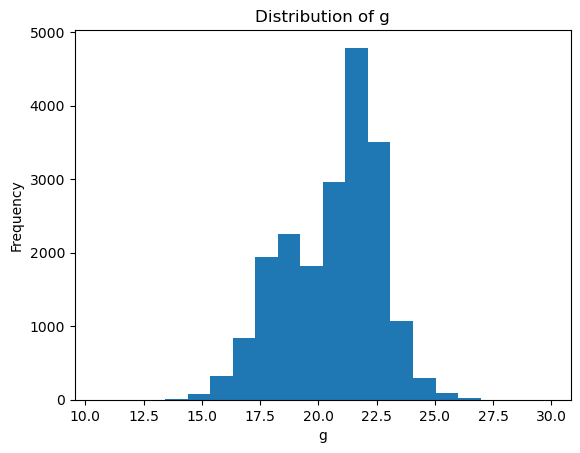

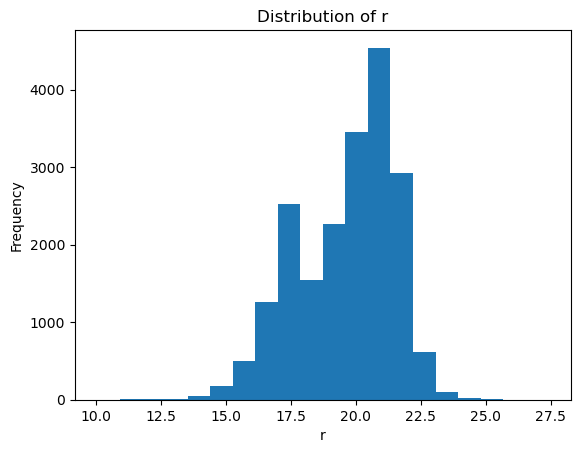

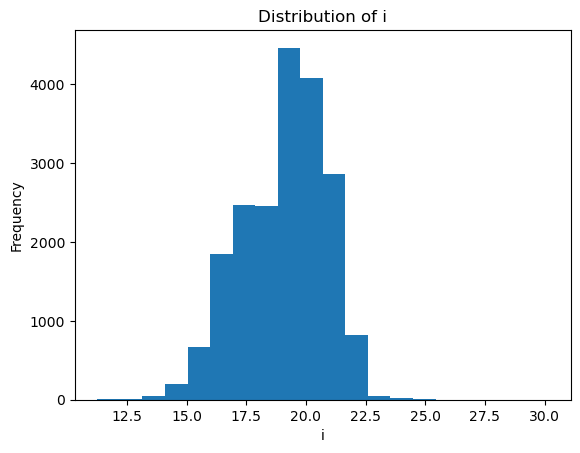

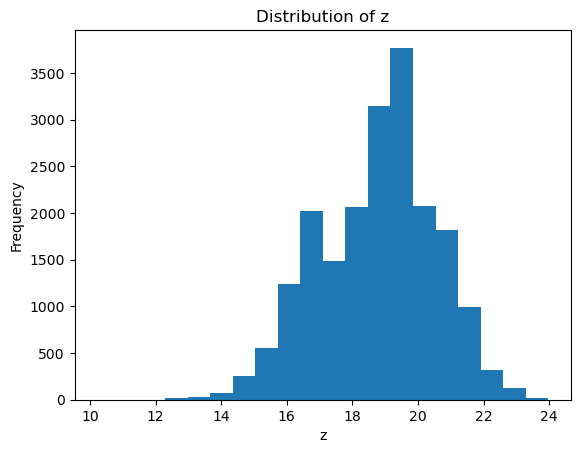

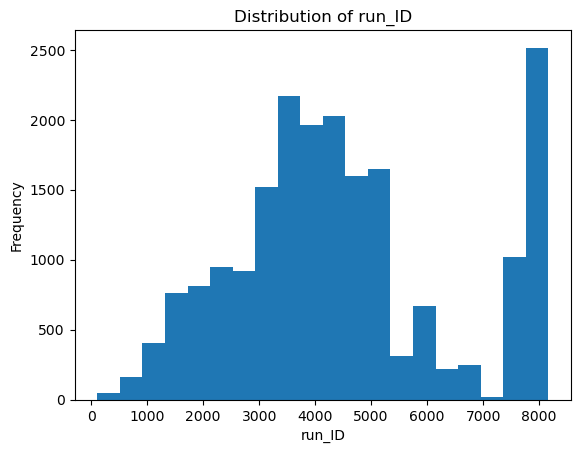

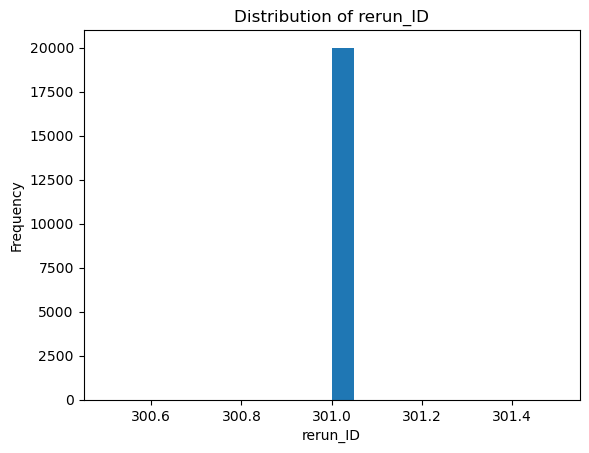

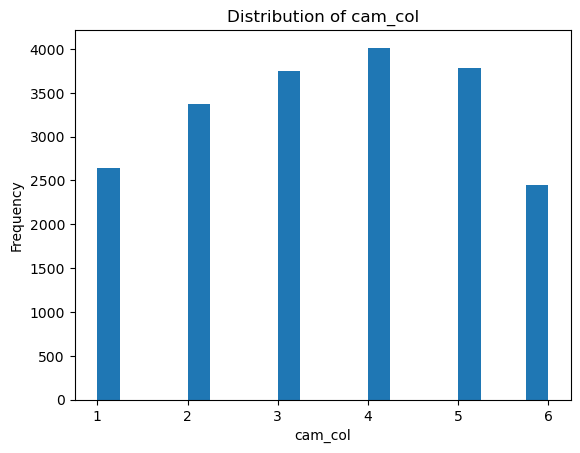

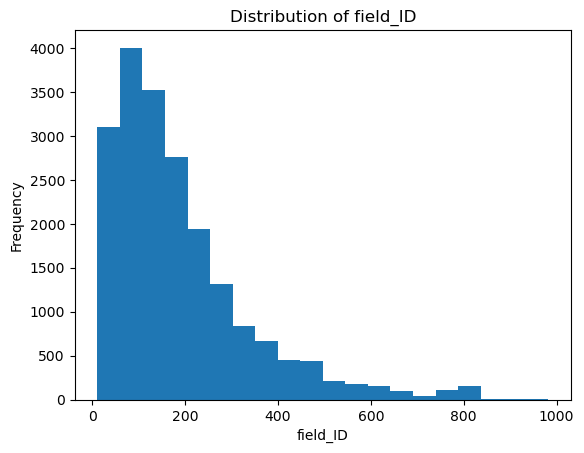

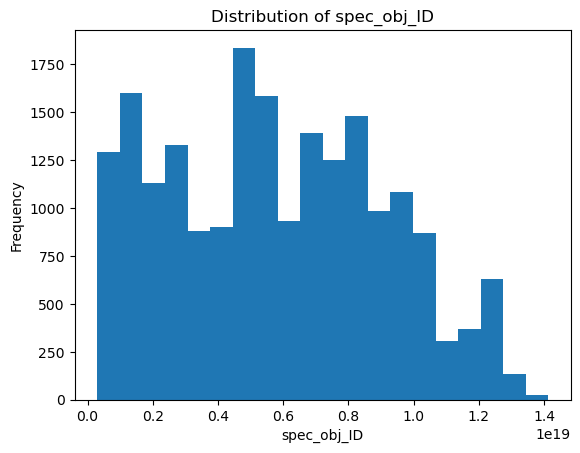

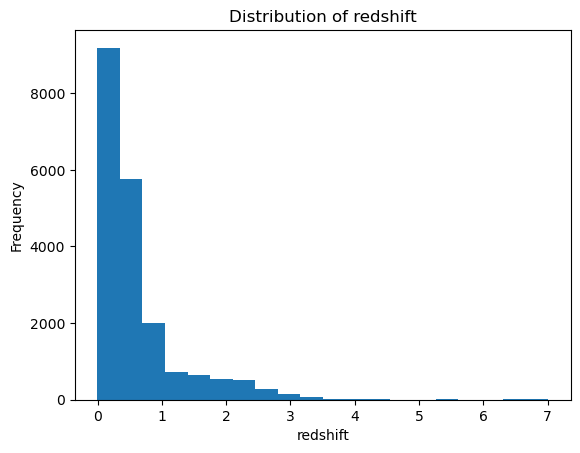

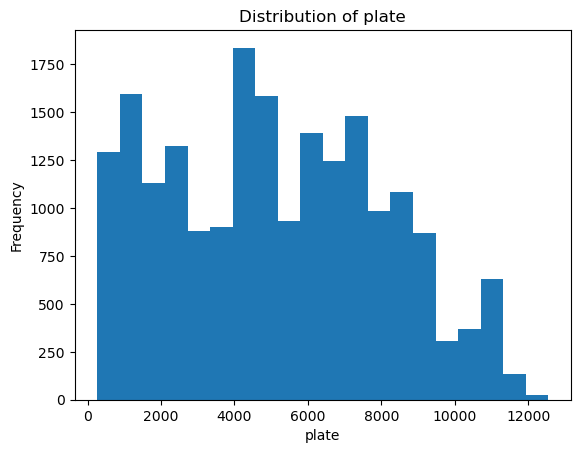

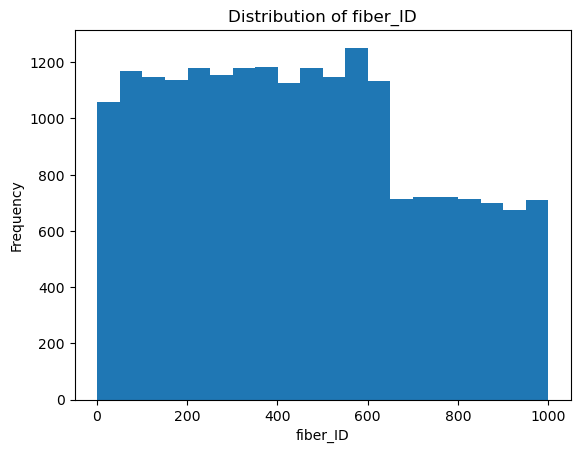

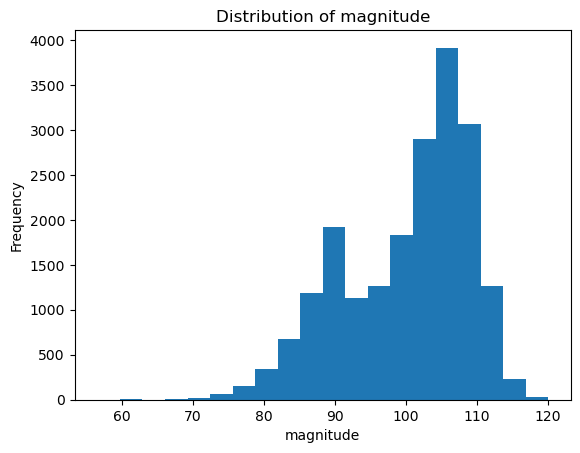

In [ ]:
for column in numeric_columns.columns:
    plt.hist(df[column], bins=20)  # Adjust bins as needed
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


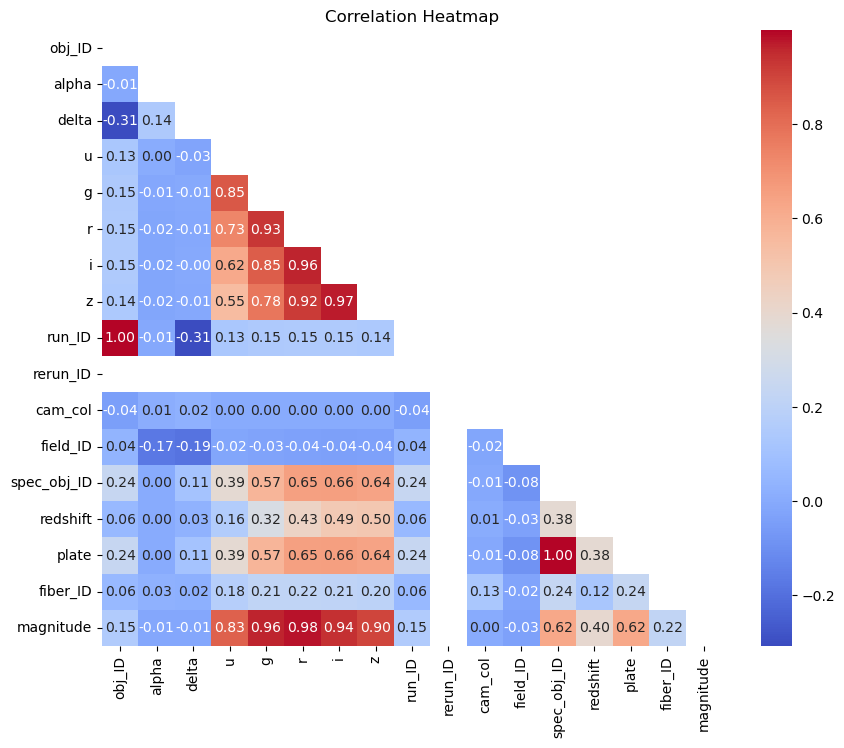

In [ ]:
correlation_matrix = df[numeric_columns.columns].corr()

plt.figure(figsize=(10, 8))

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap')
plt.show()

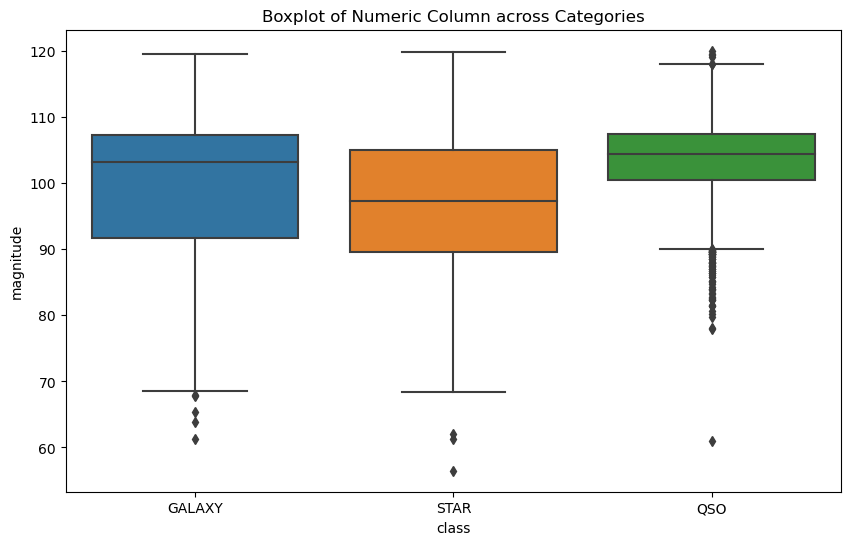

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='magnitude', data=df)
plt.title('Boxplot of Numeric Column across Categories')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


In [ ]:
df = df.drop('MJD', axis=1)

In [ ]:
X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Classifier Performance:")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Classifier Performance:
              precision    recall  f1-score   support

      GALAXY       0.97      0.97      0.97      2344
         QSO       0.90      0.92      0.91       785
        STAR       1.00      1.00      1.00       871

    accuracy                           0.96      4000
   macro avg       0.96      0.96      0.96      4000
weighted avg       0.96      0.96      0.96      4000

Accuracy: 0.963


In [ ]:
param_grid_dt = {'max_depth': [5, 10, 15, None], 'min_samples_split': [2, 5, 10]}
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=3)
grid_search_dt.fit(X_train, y_train)

print("Best Parameters:", grid_search_dt.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_split': 5}


In [ ]:
best_dt_model = grid_search_dt.best_estimator_
y_pred_tuned_dt = best_dt_model.predict(X_test)
print("Tuned Decision Tree Classifier Performance:")
print(classification_report(y_test, y_pred_tuned_dt))
print("Accuracy (Tuned Model):", accuracy_score(y_test, y_pred_tuned_dt))


Tuned Decision Tree Classifier Performance:
              precision    recall  f1-score   support

      GALAXY       0.97      0.98      0.98      2344
         QSO       0.95      0.91      0.93       785
        STAR       1.00      1.00      1.00       871

    accuracy                           0.97      4000
   macro avg       0.97      0.96      0.97      4000
weighted avg       0.97      0.97      0.97      4000

Accuracy (Tuned Model): 0.97175


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classifier Performance:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Classifier Performance:
              precision    recall  f1-score   support

      GALAXY       0.98      0.98      0.98      2344
         QSO       0.97      0.93      0.95       785
        STAR       0.98      1.00      0.99       871

    accuracy                           0.98      4000
   macro avg       0.97      0.97      0.97      4000
weighted avg       0.98      0.98      0.98      4000

Accuracy: 0.97525


In [ ]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=3)
grid_search_rf.fit(X_train, y_train)

print("Best Parameters:", grid_search_rf.best_params_)

Best Parameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:
best_rf_model = grid_search_rf.best_estimator_
y_pred_tuned_rf = best_rf_model.predict(X_test)
print("Tuned Random Forest Classifier Performance:")
print(classification_report(y_test, y_pred_tuned_rf))
print("Accuracy (Tuned Model):", accuracy_score(y_test, y_pred_tuned_rf))


Tuned Random Forest Classifier Performance:
              precision    recall  f1-score   support

      GALAXY       0.98      0.98      0.98      2344
         QSO       0.96      0.93      0.95       785
        STAR       0.98      1.00      0.99       871

    accuracy                           0.98      4000
   macro avg       0.97      0.97      0.97      4000
weighted avg       0.98      0.98      0.98      4000

Accuracy (Tuned Model): 0.97525
